In [37]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [48]:
def create_random_dag(num_nodes, edge_prob):
    G = nx.DiGraph()
    G.add_node(0, layer=0)  # Start with the source node

    for i in range(1, num_nodes):
        G.add_node(i)
        for j in range(i):
            # Add an edge with a given probability
            if random.random() < edge_prob:
                G.add_edge(j, i, probability=random.random())

    # Assign layers based on the maximal distance from the source node
    for node in nx.topological_sort(G):
        layer = 0
        if G.pred[node]:  # If the node has predecessors
            # 确定所在的layer
            layer = max([G.nodes[p]['layer'] for p in G.pred[node]]) + 1
        G.nodes[node]['layer'] = layer

        # Randomly decide if this node has a numerical attribute
        if random.random() < 0.5:
            G.nodes[node]['numerical_attr'] = random.randint(1, 100)

    return G

# Example usage
num_nodes = 10
edge_prob = 0.3
dag = create_random_dag(num_nodes, edge_prob)

# Print the nodes and their attributes
for node in dag.nodes(data=True):
    print(node)

# Print the edges and their probabilities
for edge in dag.edges(data=True):
    print(edge)


(0, {'layer': 0, 'numerical_attr': 4})
(1, {'layer': 0, 'numerical_attr': 89})
(2, {'layer': 1, 'numerical_attr': 54})
(3, {'layer': 1, 'numerical_attr': 23})
(4, {'layer': 1})
(5, {'layer': 1, 'numerical_attr': 38})
(6, {'layer': 0})
(7, {'layer': 2, 'numerical_attr': 72})
(8, {'layer': 2})
(9, {'layer': 2})
(0, 7, {'probability': 0.18887292268342482})
(0, 9, {'probability': 0.915177081014608})
(1, 2, {'probability': 0.7652765968167891})
(1, 3, {'probability': 0.48084855326038134})
(1, 4, {'probability': 0.32045463520729034})
(1, 5, {'probability': 0.6466636571959291})
(1, 8, {'probability': 0.05427338993060238})
(2, 7, {'probability': 0.1965852975422976})
(2, 8, {'probability': 0.31269035655531874})
(3, 9, {'probability': 0.978949788443548})
(4, 8, {'probability': 0.6596329489410728})
(5, 9, {'probability': 0.852251198286124})
(6, 7, {'probability': 0.3383259475975089})


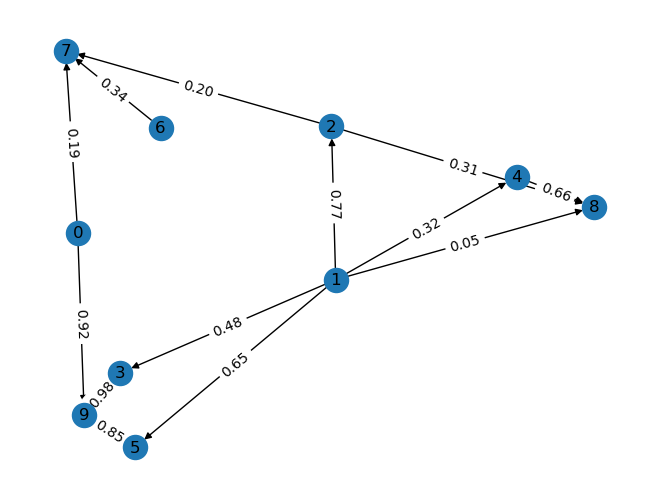

In [49]:
# Draw the graph
pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True)
edge_probabilities = nx.get_edge_attributes(dag, 'probability')
edge_labels = {edge: f"{prob:.2f}" for edge, prob in edge_probabilities.items()}
nx.draw_networkx_edge_labels(dag, pos, edge_labels=edge_labels)
plt.show()

In [50]:
def create_random_dag(num_nodes, edge_prob):
    """Create a random directed acyclic graph (DAG)"""
    G = nx.DiGraph()
    for i in range(num_nodes):
        G.add_node(i)
        for j in range(i):
            if random.random() < edge_prob:
                G.add_edge(j, i)
    return G

def add_edge_attributes(G):
    """Add selection probabilities to edges"""
    for u, v in G.edges():
        G.edges[u, v]['probability'] = 1# random.random()

def add_node_attributes(G, num_attrib_nodes):
    """Add random numerical attributes to nodes"""
    for node in random.sample(list(G.nodes()), num_attrib_nodes):
        G.nodes[node]['attribute'] = random.randint(1, 100)

# Parameters
num_nodes = 10  # total number of nodes
edge_prob = 0.3  # probability of edge creation
num_attrib_nodes = 5  # number of nodes with numerical attributes

# Create DAG
G = create_random_dag(num_nodes, edge_prob)

# Add attributes
add_edge_attributes(G)
add_node_attributes(G, num_attrib_nodes)

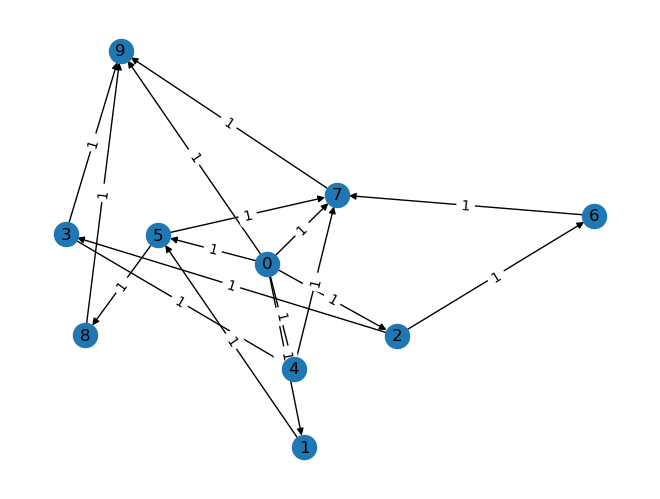

In [51]:

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'probability')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()
